# The Erdős-Rényi model

The Erdős-Rényi model is one of the simplest random graph model that exists. It is interesting to study, since it allows you to investigate properties that we also see in other real-life network models in the simplest possible settings. Due to its simplicity, it also allows you to investigate why certain graph algorithms work or break down.

The model has two parameters: $n$ and $p$. The graph is formed by considering the vertex set $V := \{1, 2, 3, \ldots, n\}$. Then, for each pair of vertices $i, j \in V$ such that $i \neq j$ we flip a coin with succes-probability $p$. If this coin lands on heads, then we add the edge $\{i, j\}$ to the edge set $E$ of the graph. If the coin lands tails, we do not add the edge. Once all pairs of vertices have been considered, the graph $G = (V, E)$ is the realization of the  Erdős-Rényi model.

**Exercise 1.** Implement the Erdős-Rényi model as described above as a function ``ER(n, p)``. Make sure it outputs the vertex list $V$ and the edge list $E$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def ER(n, p):
    # Step 1: Initialize the vertex set V
    V = list(range(1, n + 1))  # Vertices are 1 through n
    
    # Step 2: Initialize the edge set E
    E = []
    
    # Step 3: Iterate over all pairs of vertices (i, j) where i < j
    for i in range(1, n + 1):
        for j in range(i + 1, n + 1):
            # Step 4: Simulate a coin flip with probability p for each pair (i, j)
            if np.random.rand() <= p:
                # If heads, add the edge (i, j) to E
                E.append((i, j))
    
    # Step 5: Return the vertex list V and the edge list E
    return V, E

V, E = ER(5, 0.5)
print("Vertices (V):", V)
print("Edges (E):", E)

Vertices (V): [1, 2, 3, 4, 5]
Edges (E): [(1, 4), (2, 4), (3, 5)]


## The Erdős-Rényi model in NetworkX and sparsity

The *NetworkX* package in Python has out-of-the-box modules to generate instances of the Erdős-Rényi model. The simplest of these is simply called ``erdos_renyi_graph``. This function is usefull to generate instances of the Erdős-Rényi model when $p$ is relatively big. Below is some code that generates an instance of the model using NetworkX, and extracts the vertex list and edge list.

In [2]:
%%time


import networkx as nx

#Generate the graph in NetworkX
n = 100
p = 0.5
G = nx.erdos_renyi_graph(n, p)

#Extract the vertex and edge list
V, E = np.array(G.nodes), np.array(G.edges)
V,E

CPU times: user 675 ms, sys: 93.7 ms, total: 769 ms
Wall time: 937 ms


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([[ 0,  1],
        [ 0,  4],
        [ 0,  6],
        ...,
        [96, 97],
        [97, 98],
        [97, 99]]))

Although the ``erdos_renyi_graph`` function is usefull in generating instances of the model, it is not the best option if $p$ is very small compared to $n$. Specifically, if $p n^2 < n^r$ for some power $r < 2$, then the function ``fast_gnp_random_graph`` is a faster way to generate an instance of the Erdős-Rényi model for $n$ large. Note that $G(n, p)$ is an alternative name for the Erdős-Rényi model. Below is an example where this alternative function is used.

In [3]:
%%time

#Generate the graph in NetworkX
n = 100
p = 0.5
G = nx.fast_gnp_random_graph(n, p)

#Extract the vertex and edge list
V, E = np.array(G.nodes), np.array(G.edges)

V,E

CPU times: user 13.5 ms, sys: 0 ns, total: 13.5 ms
Wall time: 13.2 ms


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([[ 0,  2],
        [ 0,  5],
        [ 0,  6],
        ...,
        [96, 97],
        [96, 98],
        [97, 98]]))

**Exercise 2.** Consider the Erdős-Rényi model with parameters $n$ and $p = 1/n$. Generate instances of the model for $n = 1000 \cdot 2^k$ with increasing integer values of $k$. Record how long each instance takes. Plot the results on a log-log scale to get an idea of the time complexity of the graph generation algorithms. To generate your instances, use your algorithm from **Exercise 1**, ``erdos_renyi_graph`` and ``fast_gnp_random_graph``. What can you say about the speed of the algorithms based on the figure?

Generating graph for n=1000...
Generating graph for n=2000...
Generating graph for n=4000...
Generating graph for n=8000...
Generating graph for n=16000...
Generating graph for n=32000...


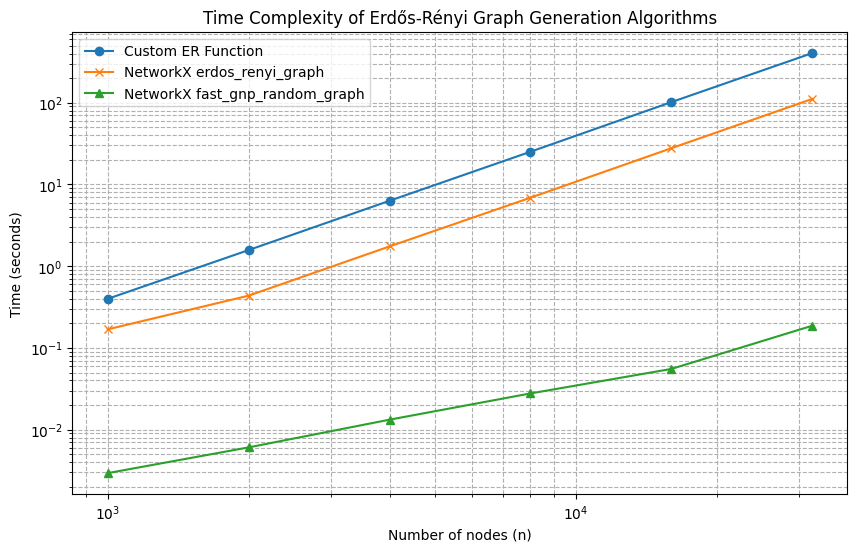

In [4]:
#Your solution goes here

def measure_time(func, *args):
    """Measure the execution time of a function."""
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Parameters
k_values = range(6)  # You can increase the range for larger values of n
n_values = [1000 * 2**k for k in k_values]
p_values = [1/n for n in n_values]

# To store the timings
times_er = []
times_erdos_renyi = []
times_fast_gnp = []

# Generate instances and record times
for n, p in zip(n_values, p_values):
    print(f"Generating graph for n={n}...")
    
    # Custom ER function
    time_er = measure_time(ER, n, p)
    times_er.append(time_er)

    # NetworkX erdos_renyi_graph function
    time_erdos_renyi = measure_time(nx.erdos_renyi_graph, n, p)
    times_erdos_renyi.append(time_erdos_renyi)

    # NetworkX fast_gnp_random_graph function
    time_fast_gnp = measure_time(nx.fast_gnp_random_graph, n, p)
    times_fast_gnp.append(time_fast_gnp)

# Plotting the results on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(n_values, times_er, label='Custom ER Function', marker='o')
plt.loglog(n_values, times_erdos_renyi, label='NetworkX erdos_renyi_graph', marker='x')
plt.loglog(n_values, times_fast_gnp, label='NetworkX fast_gnp_random_graph', marker='^')

plt.xlabel('Number of nodes (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Erdős-Rényi Graph Generation Algorithms')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Properties of the Erdős-Rényi model

Despite its simplicity, the Erdős-Rényi model has many interesting properties that we also see in real-life networks. For example, we can see in the Erdős-Rényi model that with relatively few (expected number of) edges we can attain pretty big connected components in the graph. It turns out that the largest connected component of the Erdős-Rényi model contains more that $\varepsilon n$ vertices for some small $\varepsilon > 0$ if we consider the model with $n$ vertices and an edge probability of $\lambda / n$ with $\lambda > 1$. Thus, we have a linear number of vertices in the largest connected component while the expected number of edges is $\lambda n$ (which is also linear).

**Exercise 3.** Verify the above statement. You can do this as follows: start by taking e.g. $n = 10000$, and generate for a fixed $\lambda$ multiple instances of the Erdős-Rényi model with $p = \lambda / n$. For each instance, compute the amount of vertices in the largest connected component, and averaging the result over all instances. Denote this result by $|\mathcal{C}_{\max}(\lambda)|$. Then, repeat this procedure for other values of $\lambda$ and plot $ |\mathcal{C}_{\max}(\lambda)|/ n$ as a function of $\lambda$. 

*Hint: Don't code all algorithms yourself. Use NetworkX.*

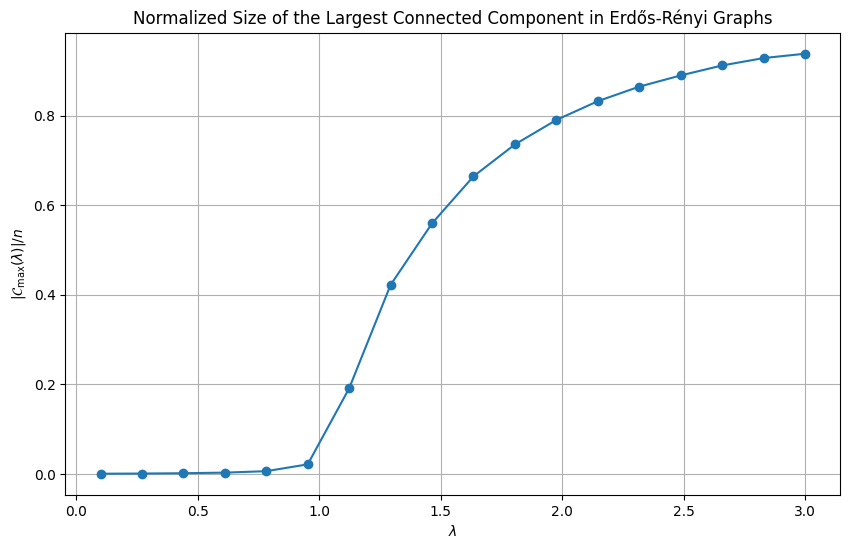

In [5]:
#Your solution goes here

n = 10000  # Number of vertices
lambdas = np.linspace(0.1, 3, 18)  # Range of lambda values to explore
num_instances = 7  # Number of instances for averaging

def largest_connected_component_size(G):
    """Return the size of the largest connected component of a graph G."""
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc)

# Store the results
avg_largest_cc_sizes = []

# Iterate over different lambda values
for lam in lambdas:
    p = lam / n  # Edge probability p = lambda / n
    largest_cc_sizes = []
    
    # Generate multiple instances of the Erdős-Rényi graph
    for _ in range(num_instances):
        # Generate an Erdős-Rényi graph
        G = nx.erdos_renyi_graph(n, p)
        
        # Calculate the size of the largest connected component
        largest_cc_size = largest_connected_component_size(G)
        largest_cc_sizes.append(largest_cc_size)
    
    # Compute the average size of the largest connected component
    avg_largest_cc_size = np.mean(largest_cc_sizes)
    avg_largest_cc_sizes.append(avg_largest_cc_size)

# Normalize the average sizes by dividing by n
normalized_avg_largest_cc_sizes = [size / n for size in avg_largest_cc_sizes]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, normalized_avg_largest_cc_sizes, marker='o', linestyle='-')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$|\mathcal{C}_{\max}(\lambda)| / n$')
plt.title('Normalized Size of the Largest Connected Component in Erdős-Rényi Graphs')
plt.grid(True)
plt.show()

Of course, due to its simplicity the Erdős-Rényi model also has a lot of properties that do not really correspond to real networks. For example, while real-world networks often have few edges, you still expect to find many triangles within them. In the Erdős-Rényi model this is not the case.

**Exercise 4.** Fix a value of $\lambda$ and consider the Erdős-Rényi model with parameters $n$ and $p = \lambda / n$. Show through simulations that, as $n \to \infty$, the number of triangles in this model goes to zero if you divide it by $n$. For each value of $n$ be sure to consider multiple instances of the model to insure randomness influences your results minimally.

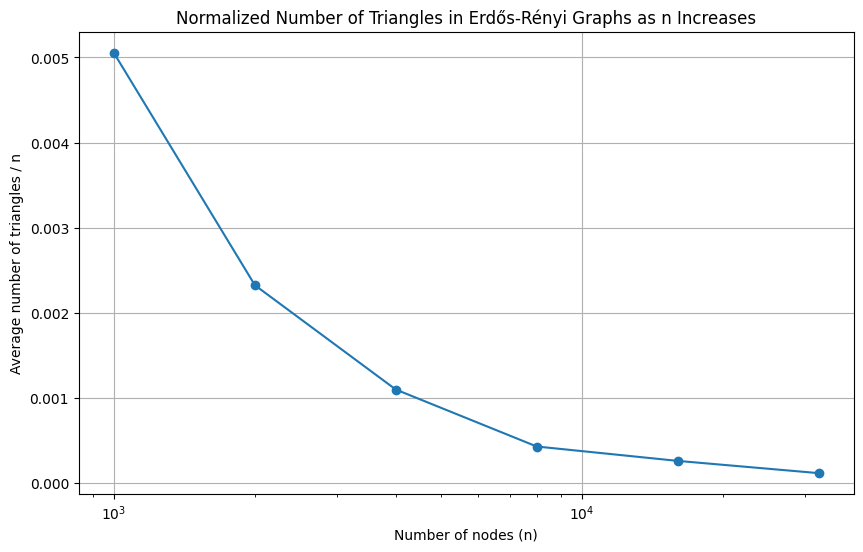

In [6]:
#Your solution goes here

# Parameters
lambda_value = 3  # Fixed lambda value
n_values = [1000, 2000, 4000, 8000, 16000, 32000]  # Increasing n values
num_instances = 20  # Number of instances to average over for each n

def count_triangles(G):
    """Returns the number of triangles in the graph G."""
    triangles_dict = nx.triangles(G)  # NetworkX function to count triangles per node
    total_triangles = sum(triangles_dict.values()) // 3  # Each triangle is counted three times
    return total_triangles

# Store the results
avg_triangles = []

# Iterate over different values of n
for n in n_values:
    p = lambda_value / n  # Edge probability p = lambda / n
    triangles_counts = []
    
    # Generate multiple instances of the Erdős-Rényi graph
    for _ in range(num_instances):
        # Generate an Erdős-Rényi graph
        G = nx.erdos_renyi_graph(n, p)
        
        # Count the number of triangles in the graph
        num_triangles = count_triangles(G)
        triangles_counts.append(num_triangles)
    
    # Compute the average number of triangles
    avg_num_triangles = np.mean(triangles_counts)
    avg_triangles.append(avg_num_triangles)

# Normalize the average number of triangles by dividing by n
normalized_avg_triangles = [triangles / n for triangles, n in zip(avg_triangles, n_values)]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, normalized_avg_triangles, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Average number of triangles / n')
plt.title('Normalized Number of Triangles in Erdős-Rényi Graphs as n Increases')
plt.grid(True)
plt.show()